# Case 1. Heart Disease Classification	11.2.2019
##### Cognitive Systems for Health Technology Applications, Spring 2019
##### Helsinki Metropolia University of Applied Sciences

##### • Pärnänen Simo, opiskelijanumero 1606318
##### • Sallinen Pasi, opiskelijanumero 1804767

## The background and data preprocessing

Case 1 (A)  is for practising our skills in sequential neural networks. With the Keras and Pandas libraries for Python programming language ýou can define the architecture of the used neural network as well as define and preprocess the data structures required by the former. It can do that when network designers have chosen a desired activation function. Initial weights and bias for the inputs will be chosen by the optimizer automatically and randomly. The neural network is in this case the tool for analysing the data of heart diseases as input data 303 cases with 14 attributes (specified below). (B), (C).

For that, we first import set of libraries such as Pandas, Keras, Scikit-learn and Matplotlib. Numpy contains several important mathematical functions. (B), (C).

Missing values in documents are replaced with -9.0 as David Aha tells in paragraph 9. at document Heart-Disease.names.(D).

We handle large amounts of data in neural networks and it is reasonable according Francois Chollet in Deep Learning with Python (E) to process the data that it becomes lighter. The process is called normalizing and there mean is subtracted of each unit and then divided by the standard deviation.

We import the dataset processed.cleveland.data. Then we convert that into the dataframe with columns below taken from data and they are explained in site heart-disease.names (D):

    • age: age in years
    
    • sex: sex (1 = male; 0 = female)
    
    • cp: chest pain type
    
    • trestbps: resting blood pressure
    
    • chol: serum cholestoral in mg/dl
    
    • fbs: fasting blood sugar
    
    • restecg: resting electrocardiographic results
    
    • thalach: maximum heart rate achieved
    
    • thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    
    • exang: exercise induced angina
    
    • oldpeak: ST depression induced by exercise relative to rest
    
    • slope: the slope of the peak exercise ST segment
    
    • ca: number of major vessels
    
    • num: diagnosis of heart disease (angiographic disease status, values range 0-4)
          -- Value 0: < 50% diameter narrowing
          -- Value 1: > 50% diameter narrowing
          (in any major vessel: attributes 59 through 68 are vessels)

#Numpy (numerical python) contains necessary mathematical functions, pandas contains functions for data manipulation and creating dataframes.

In [29]:
import io
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from keras import metrics
from keras import models
from keras import layers
import keras.utils as kerasutils
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

def createData():
    patients = [(63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0),
                (67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2),
                (67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1),
                (37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0),
                (41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0),
                (56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0),
                (62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3),
                (57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0),
                (63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2),
                (53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1),
                (57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0),
                (63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2),
                (53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1),
                (57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0),
                (56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0),
                (56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2),
                (44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0),
                (52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0),
                (48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,7.0,1),
                (54.0,1.0,4.0,140.0,239.0,0.0,0.0,160.0,0.0,1.2,1.0,0.0,3.0,0),
                (48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,0),
                (49.0,1.0,2.0,130.0,266.0,0.0,0.0,171.0,0.0,0.6,1.0,0.0,3.0,0),
                (64.0,1.0,1.0,110.0,211.0,0.0,2.0,144.0,1.0,1.8,2.0,0.0,3.0,0),
                (58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0),
                (58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1),
                (58.0,1.0,3.0,132.0,224.0,0.0,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3),
                (60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4),
                (50.0,0.0,3.0,120.0,219.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0),
                (58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0),
                (66.0,0.0,1.0,150.0,226.0,0.0,0.0,114.0,0.0,2.6,3.0,0.0,3.0,0),
                (43.0,1.0,4.0,150.0,247.0,0.0,0.0,171.0,0.0,1.5,1.0,0.0,3.0,0),
                (40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3),
                (69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0),
                (60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2),
                (64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1),
                (59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0,0),
                (44.0,1.0,3.0,130.0,233.0,0.0,0.0,179.0,1.0,0.4,1.0,0.0,3.0,0),
                (42.0,1.0,4.0,140.0,226.0,0.0,0.0,178.0,0.0,0.0,1.0,0.0,3.0,0),
                (43.0,1.0,4.0,120.0,177.0,0.0,2.0,120.0,1.0,2.5,2.0,0.0,7.0,3),
                (57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.0,6.0,1),
                (55.0,1.0,4.0,132.0,353.0,0.0,0.0,132.0,1.0,1.2,2.0,1.0,7.0,3),
                (61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0,0),
                (65.0,0.0,4.0,150.0,225.0,0.0,2.0,114.0,0.0,1.0,2.0,3.0,7.0,4),
                (40.0,1.0,1.0,140.0,199.0,0.0,0.0,178.0,1.0,1.4,1.0,0.0,7.0,0),
                (71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0,0),
                (59.0,1.0,3.0,150.0,212.0,1.0,0.0,157.0,0.0,1.6,1.0,0.0,3.0,0),
                (61.0,0.0,4.0,130.0,330.0,0.0,2.0,169.0,0.0,0.0,1.0,0.0,3.0,1),
                (58.0,1.0,3.0,112.0,230.0,0.0,2.0,165.0,0.0,2.5,2.0,1.0,7.0,4),
                (51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0,0),
                (50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0,4),
                (65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0),
                (53.0,1.0,3.0,130.0,197.0,1.0,2.0,152.0,0.0,1.2,3.0,0.0,3.0,0),
                (41.0,0.0,2.0,105.0,198.0,0.0,0.0,168.0,0.0,0.0,1.0,1.0,3.0,0),
                (65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,0),
                (44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0,2),
                (44.0,1.0,2.0,130.0,219.0,0.0,2.0,188.0,0.0,0.0,1.0,0.0,3.0,0),
                (60.0,1.0,4.0,130.0,253.0,0.0,0.0,144.0,1.0,1.4,1.0,1.0,7.0,1),
                (54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.0,7.0,1),
                (50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0,1),
                (41.0,1.0,4.0,110.0,172.0,0.0,2.0,158.0,0.0,0.0,1.0,0.0,7.0,1),
                (54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1.0,3.0,0),
                (51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0),
                (51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2),
                (46.0,0.0,3.0,142.0,177.0,0.0,2.0,160.0,1.0,1.4,3.0,0.0,3.0,0),
                (58.0,1.0,4.0,128.0,216.0,0.0,2.0,131.0,1.0,2.2,2.0,3.0,7.0,1),
                (54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0),
                (54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2),
                (60.0,1.0,4.0,145.0,282.0,0.0,2.0,142.0,1.0,2.8,2.0,2.0,7.0,2),
                (60.0,1.0,3.0,140.0,185.0,0.0,2.0,155.0,0.0,3.0,2.0,0.0,3.0,1),
                (54.0,1.0,3.0,150.0,232.0,0.0,2.0,165.0,0.0,1.6,1.0,0.0,7.0,0),
                (59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0,2),
                (46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0.0,3.0,1),
                (65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0,0),
                (67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,3),
                (62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0,1),
                (65.0,1.0,4.0,110.0,248.0,0.0,2.0,158.0,0.0,0.6,1.0,2.0,6.0,1),
                (44.0,1.0,4.0,110.0,197.0,0.0,2.0,177.0,0.0,0.0,1.0,1.0,3.0,1),
                (65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0),
                (60.0,1.0,4.0,125.0,258.0,0.0,2.0,141.0,1.0,2.8,2.0,1.0,7.0,1),
                (51.0,0.0,3.0,140.0,308.0,0.0,2.0,142.0,0.0,1.5,1.0,1.0,3.0,0),
                (48.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0.0,3.0,0),
                (58.0,1.0,4.0,150.0,270.0,0.0,2.0,111.0,1.0,0.8,1.0,0.0,7.0,3),
                (45.0,1.0,4.0,104.0,208.0,0.0,2.0,148.0,1.0,3.0,2.0,0.0,3.0,0),
                (53.0,0.0,4.0,130.0,264.0,0.0,2.0,143.0,0.0,0.4,2.0,0.0,3.0,0),
                (39.0,1.0,3.0,140.0,321.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0,0),
                (68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3),
                (52.0,1.0,2.0,120.0,325.0,0.0,0.0,172.0,0.0,0.2,1.0,0.0,3.0,0),
                (44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0,0),
                (47.0,1.0,3.0,138.0,257.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0,0),
                (53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,np.NaN,0),
                (53.0,0.0,4.0,138.0,234.0,0.0,2.0,160.0,0.0,0.0,1.0,0.0,3.0,0),
                (51.0,0.0,3.0,130.0,256.0,0.0,2.0,149.0,0.0,0.5,1.0,0.0,3.0,0),
                (66.0,1.0,4.0,120.0,302.0,0.0,2.0,151.0,0.0,0.4,2.0,0.0,3.0,0),
                (62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0,3),
                (62.0,1.0,3.0,130.0,231.0,0.0,0.0,146.0,0.0,1.8,2.0,3.0,7.0,0),
                (44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0),
                (63.0,0.0,3.0,135.0,252.0,0.0,2.0,172.0,0.0,0.0,1.0,0.0,3.0,0),
                (52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1.0,7.0,1),
                (59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2),
                (60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3),
                (52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0),
                (48.0,1.0,4.0,122.0,222.0,0.0,2.0,186.0,0.0,0.0,1.0,0.0,3.0,0),
                (45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0,0),
                (34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0,0),
                (57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0),
                (71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,0),
                (49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3),
                (54.0,1.0,2.0,108.0,309.0,0.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0,0),
                (59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0,2),
                (57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0,1),
                (61.0,1.0,4.0,120.0,260.0,0.0,0.0,140.0,1.0,3.6,2.0,1.0,7.0,2),
                (39.0,1.0,4.0,118.0,219.0,0.0,0.0,140.0,0.0,1.2,2.0,0.0,7.0,3),
                (61.0,0.0,4.0,145.0,307.0,0.0,2.0,146.0,1.0,1.0,2.0,0.0,7.0,1),
                (56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1),
                (52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0,0),
                (43.0,0.0,4.0,132.0,341.0,1.0,2.0,136.0,1.0,3.0,2.0,0.0,7.0,2),
                (62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0,2),
                (41.0,1.0,2.0,135.0,203.0,0.0,0.0,132.0,0.0,0.0,2.0,0.0,6.0,0),
                (58.0,1.0,3.0,140.0,211.0,1.0,2.0,165.0,0.0,0.0,1.0,0.0,3.0,0),
                (35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0),
                (63.0,1.0,4.0,130.0,330.0,1.0,2.0,132.0,1.0,1.8,1.0,3.0,7.0,3),
                (65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0,2),
                (48.0,1.0,4.0,130.0,256.0,1.0,2.0,150.0,1.0,0.0,1.0,2.0,7.0,3),
                (63.0,.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4),
                (51.0,1.0,3.0,100.0,222.0,0.0,0.0,143.0,1.0,1.2,2.0,0.0,3.0,0),
                (55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3),
                (65.0,1.0,1.0,138.0,282.0,1.0,2.0,174.0,0.0,1.4,2.0,1.0,3.0,1),
                (45.0,0.0,2.0,130.0,234.0,0.0,2.0,175.0,0.0,0.6,2.0,0.0,3.0,0),
                (56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3),
                (54.0,1.0,4.0,110.0,239.0,0.0,0.0,126.0,1.0,2.8,2.0,1.0,7.0,3),
                (44.0,1.0,2.0,120.0,220.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0),
                (62.0,0.0,4.0,124.0,209.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0),
                (54.0,1.0,3.0,120.0,258.0,0.0,2.0,147.0,0.0,0.4,2.0,0.0,7.0,0),
                (51.0,1.0,3.0,94.0,227.0,0.0,0.0,154.0,1.0,0.0,1.0,1.0,7.0,0),
                (29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0),
                (51.0,1.0,4.0,140.0,261.0,0.0,2.0,186.0,1.0,0.0,1.0,0.0,3.0,0),
                (43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0),
                (55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,0),
                (70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,4),
                (62.0,1.0,2.0,120.0,281.0,0.0,2.0,103.0,0.0,1.4,2.0,1.0,7.0,3),
                (35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,2.0,0.0,7.0,1),
                (51.0,1.0,3.0,125.0,245.0,1.0,2.0,166.0,0.0,2.4,2.0,0.0,3.0,0),
                (59.0,1.0,2.0,140.0,221.0,0.0,0.0,164.0,1.0,0.0,1.0,0.0,3.0,0),
                (59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,1),
                (52.0,1.0,2.0,128.0,205.0,1.0,0.0,184.0,0.0,0.0,1.0,0.0,3.0,0),
                (64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1),
                (58.0,1.0,3.0,105.0,240.0,0.0,2.0,154.0,1.0,0.6,2.0,0.0,7.0,0),
                (47.0,1.0,3.0,108.0,243.0,0.0,0.0,152.0,0.0,0.0,1.0,0.0,3.0,1),
                (57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,4),
                (41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0),
                (45.0,1.0,2.0,128.0,308.0,0.0,2.0,170.0,0.0,0.0,1.0,0.0,3.0,0),
                (60.0,0.0,3.0,102.0,318.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0,0),
                (52.0,1.0,1.0,152.0,298.0,1.0,0.0,178.0,0.0,1.2,2.0,0.0,7.0,0),
                (42.0,0.0,4.0,102.0,265.0,0.0,2.0,122.0,0.0,0.6,2.0,0.0,3.0,0),
                (67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0),
                (55.0,1.0,4.0,160.0,289.0,0.0,2.0,145.0,1.0,0.8,2.0,1.0,7.0,4),
                (64.0,1.0,4.0,120.0,246.0,0.0,2.0,96.0,1.0,2.2,3.0,1.0,3.0,3),
                (70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1),
                (51.0,1.0,4.0,140.0,299.0,0.0,0.0,173.0,1.0,1.6,1.0,0.0,7.0,1),
                (58.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,7.0,1),
                (60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2),
                (68.0,1.0,3.0,118.0,277.0,0.0,0.0,151.0,0.0,1.0,1.0,1.0,7.0,0),
                (46.0,1.0,2.0,101.0,197.0,1.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0,0),
                (77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4),
                (54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0),
                (58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0,0),
                (48.0,1.0,3.0,124.0,255.0,1.0,0.0,175.0,0.0,0.0,1.0,2.0,3.0,0),
                (57.0,1.0,4.0,132.0,207.0,0.0,0.0,168.0,1.0,0.0,1.0,0.0,7.0,0),
                (52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,np.NaN,3.0,0),
                (54.0,0.0,2.0,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,3.0,0),
                (35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1),
                (45.0,0.0,2.0,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,0),
                (70.0,1.0,3.0,160.0,269.0,0.0,0.0,112.0,1.0,2.9,2.0,1.0,7.0,3),
                (53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0),
                (59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1),
                (62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0),
                (64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,4),
                (57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0,1),
                (52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0),
                (56.0,1.0,4.0,132.0,184.0,0.0,2.0,105.0,1.0,2.1,2.0,1.0,6.0,1),
                (43.0,1.0,3.0,130.0,315.0,0.0,0.0,162.0,0.0,1.9,1.0,1.0,3.0,0),
                (53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0),
                (48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,7.0,3),
                (56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2),
                (42.0,1.0,1.0,148.0,244.0,0.0,2.0,178.0,0.0,0.8,1.0,2.0,3.0,0),
                (59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,0),
                (60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1),
                (63.0,0.0,2.0,140.0,195.0,0.0,0.0,179.0,0.0,0.0,1.0,2.0,3.0,0),
                (42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0,0),
                (66.0,1.0,2.0,160.0,246.0,0.0,0.0,120.0,1.0,0.0,2.0,3.0,6.0,2),
                (54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1),
                (69.0,1.0,3.0,140.0,254.0,0.0,2.0,146.0,0.0,2.0,2.0,3.0,7.0,2),
                (50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0),
                (51.0,1.0,4.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0,3),
                (43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,np.NaN,7.0,1),
                (62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2),
                (68.0,0.0,3.0,120.0,211.0,0.0,2.0,115.0,0.0,1.5,2.0,0.0,3.0,0),
                (67.0,1.0,4.0,100.0,299.0,0.0,2.0,125.0,1.0,0.9,2.0,2.0,3.0,3),
                (69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0,0),
                (45.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0,0),
                (50.0,0.0,2.0,120.0,244.0,0.0,0.0,162.0,0.0,1.1,1.0,0.0,3.0,0),
                (59.0,1.0,1.0,160.0,273.0,0.0,2.0,125.0,0.0,0.0,1.0,0.0,3.0,1),
                (50.0,0.0,4.0,110.0,254.0,0.0,2.0,159.0,0.0,0.0,1.0,0.0,3.0,0),
                (64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0),
                (57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0,0),
                (64.0,0.0,3.0,140.0,313.0,0.0,0.0,133.0,0.0,0.2,1.0,0.0,7.0,0),
                (43.0,1.0,4.0,110.0,211.0,0.0,0.0,161.0,0.0,0.0,1.0,0.0,7.0,0),
                (45.0,1.0,4.0,142.0,309.0,0.0,2.0,147.0,1.0,0.0,2.0,3.0,7.0,3),
                (58.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,2.0,7.0,3),
                (50.0,1.0,4.0,144.0,200.0,0.0,2.0,126.0,1.0,0.9,2.0,0.0,7.0,3),
                (55.0,1.0,2.0,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,3.0,0),
                (62.0,0.0,4.0,150.0,244.0,0.0,0.0,154.0,1.0,1.4,2.0,0.0,3.0,1),
                (37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0),
                (38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,4),
                (41.0,1.0,3.0,130.0,214.0,0.0,2.0,168.0,0.0,2.0,2.0,0.0,3.0,0),
                (66.0,0.0,4.0,178.0,228.0,1.0,0.0,165.0,1.0,1.0,2.0,2.0,7.0,3),
                (52.0,1.0,4.0,112.0,230.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0,1),
                (5.0,1.0,1.0,120.0,193.0,0.0,2.0,162.0,0.0,1.9,2.0,0.0,7.0,0),
                (46.0,0.0,2.0,105.0,204.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0),
                (46.0,0.0,4.0,138.0,243.0,0.0,2.0,152.0,1.0,0.0,2.0,0.0,3.0,0),
                (64.0,0.0,4.0,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0,0),
                (59.0,1.0,4.0,138.0,271.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0,0),
                (41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0,0),
                (54.0,0.0,3.0,108.0,267.0,0.0,2.0,167.0,0.0,0.0,1.0,0.0,3.0,0),
                (39.0,0.0,3.0,94.0,199.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0),
                (53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2.0,7.0,3),
                (63.0,0.0,4.0,108.0,269.0,0.0,0.0,169.0,1.0,1.8,2.0,2.0,3.0,1),
                (34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0),
                (47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0,0),
                (67.0,0.0,3.0,152.0,277.0,0.0,0.0,172.0,0.0,0.0,1.0,1.0,3.0,0),
                (54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3),
                (66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,1.0,3.0,2),
                (52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,0),
                (55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2),
                (49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.0,0.8,1.0,3.0,3.0,1),
                (74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0),
                (54.0,0.0,3.0,160.0,201.0,0.0,0.0,163.0,0.0,0.0,1.0,1.0,3.0,0),
                (54.0,1.0,4.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,3.0,3),
                (56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0,2),
                (46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0,1),
                (49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0,0),
                (42.0,1.0,2.0,120.0,295.0,0.0,0.0,162.0,0.0,0.0,1.0,0.0,3.0,0),
                (41.0,1.0,2.0,110.0,235.0,0.0,0.0,153.0,0.0,0.0,1.0,0.0,3.0,0),
                (41.0,0.0,2.0,126.0,306.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0),
                (49.0,0.0,4.0,130.0,269.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0),
                (61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0,2),
                (60.0,0.0,3.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,1.0,0.0,3.0,0),
                (67.0,1.0,4.0,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0,2),
                (58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2),
                (47.0,1.0,4.0,110.0,275.0,0.0,2.0,118.0,1.0,1.0,2.0,1.0,3.0,1),
                (52.0,1.0,4.0,125.0,212.0,0.0,0.0,168.0,0.0,1.0,1.0,2.0,7.0,3),
                (62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0),             
                (57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0),
                (58.0,1.0,4.0,146.0,218.0,0.0,0.0,105.0,0.0,2.0,2.0,1.0,7.0,1),
                (64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0),
                (51.0,0.0,3.0,120.0,295.0,0.0,2.0,157.0,0.0,0.6,1.0,0.0,3.0,0),
                (43.0,1.0,4.0,115.0,303.0,0.0,0.0,181.0,0.0,1.2,2.0,0.0,3.0,0),
                (42.0,0.0,3.0,120.0,209.0,0.0,0.0,173.0,0.0,0.0,2.0,0.0,3.0,0),
                (67.0,0.0,4.0,106.0,223.0,0.0,0.0,142.0,0.0,0.3,1.0,2.0,3.0,0),
                (76.0,0.0,3.0,140.0,197.0,0.0,1.0,116.0,0.0,1.1,2.0,0.0,3.0,0),
                (70.0,1.0,2.0,156.0,245.0,0.0,2.0,143.0,0.0,0.0,1.0,0.0,3.0,0),
                (57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1),
                (44.0,0.0,3.0,118.0,242.0,0.0,0.0,149.0,0.0,0.3,2.0,1.0,3.0,0),
                (58.0,0.0,2.0,136.0,319.0,1.0,2.0,152.0,0.0,0.0,1.0,2.0,3.0,3),
                (60.0,0.0,1.0,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0,0),
                (44.0,1.0,3.0,120.0,226.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0),
                (61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,4),
                (42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0,2),
                (52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,np.NaN,2),
                (59.0,1.0,3.0,126.0,218.0,1.0,0.0,134.0,0.0,2.2,2.0,1.0,6.0,2),
                (40.0,1.0,4.0,152.0,223.0,0.0,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1),
                (42.0,1.0,3.0,130.0,180.0,0.0,0.0,150.0,0.0,0.0,1.0,0.0,3.0,0),
                (61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0,1),
                (66.0,1.0,4.0,160.0,228.0,0.0,2.0,138.0,0.0,2.3,1.0,0.0,6.0,0),
                (46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2),
                (71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0,0),
                (59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0,1),
                (64.0,1.0,1.0,170.0,227.0,0.0,2.0,155.0,0.0,0.6,2.0,0.0,7.0,0),
                (66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0,0),
                (39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0),
                (57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1),
                (58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0),
                (57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2),
                (47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0),
                (55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3),
                (35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0),
                (61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2),
                (58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4),
                (58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2),
                (58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,np.NaN,7.0,0),
                (56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0),
                (56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0),
                (67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1),
                (55.0,0.0,2.0,132.0,342.0,0.0,0.0,166.0,0.0,1.2,1.0,0.0,3.0,0),
                (44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,2),
                (63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2),
                (63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1),
                (41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0),
                (59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3),
                (45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1),
                (68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2),
                (57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3),
                (57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1),
                (38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,np.NaN,3.0,0)
               ]
    return patients


## The model
### OHJE:  Description and code for the neural networks model(s) How the training and testing were conducted (epoch, batch sizes, solver settings) how much data was used for testing/validation purposes

The team utilises a sequential model for the neural network.
The data is divided into three parts: train set size of 180, validation 60 and test 63. The train set is used for practising the neural network for as good as possible and the two other for validating and testing it. We set the epoch for 5 so the model goes through the training set 5 times. Batch size is 303, meaning that every 303 samples the model optimizes the settings. Separate validation and test sets are needed to validate the networks usefulness for analyzing fresh data. The rows of the original dataset are not ordered in accordance with any parameter, therefore we judged that randomizing the data by shuffling the data rows was unnecessary.
 Activation is first set for softmax because it's more reliable than ReLu and the teacher recommended it. ReLu should be experimented on as well.


## The objectives


Due to our inexperience in this field, the team’s first priority is to ensure that the trained algorithm is more accurate than simply randomly guessing a patient’s disease classification regardless of the input data.

Frequency of classification 0: 162/303=0,5346% of total

Frequency of classification 1: 57/303=0,18811% of total

Frequency of classification 2: 36/303=0,118811% of total

Frequency of classification 3: 35/303=0,1155% of total

Frequency of classification 4: 13/303=0,0429% of total

The expected value and classification accuracy for such a guess (sum of products with frequencies and possibility of the classification being chosen (20%) as the factors) is thus roughly 20 percent.



According to the description of the original dataset(D), some researchers achieved a final accuracy of 77 percent with a logistic-regression-derived discriminant function. Our long-term goal should be something similar, with small differences between the final accuracies obtained through training and validation sessions to prove that no harmful overfitting and underfitting of data has taken place.


Data:
 <_io.TextIOWrapper name='case_1_data.npy' mode='r' encoding='cp1252'>
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10   57.0  0.0  4.0     120.0  354.0  0.0      0.0    

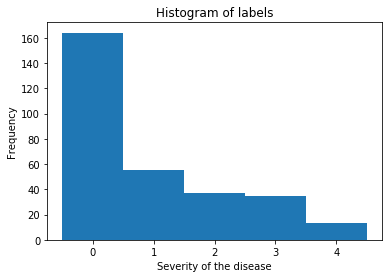

Shape of data and one-hot-labels: (304, 13) (304, 5)


In [30]:
#dataset=pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', header=None, index_col=None, na_values='?', encoding='UTF-8', dtype='float64')
#df=pd.DataFrame(data=dataset, columns=['age', 'sex', 'cp' ,'trestbps', 'chol', 'fbs','restecg',
#             'thalach','exang','oldpeak','slope','ca','thal','num'])

df2=pd.DataFrame(createData(),columns=['age', 'sex', 'cp' ,'trestbps', 'chol', 'fbs','restecg',
             'thalach','exang','oldpeak','slope','ca','thal','num'])

df2 = df2.fillna(df2.median())


data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalach','exang','oldpeak','slope','ca','thal']
data = df2[data_list]




data_min = data.min()
data_max = data.max()
data_norm = (data - data_min)/(data_max - data_min)


np.save('case_1_data.npy', data_norm)
datafile=open('case_1_data.npy', 'r')

print('Data:\n', datafile)



labels = df2['num']
print(df2)
plt.hist(labels, bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')
plt.show()


one_hot_labels = kerasutils.to_categorical(labels)
one_hot_labels[:6]



train_set=data_norm[:180]
valid_set=data_norm[180:240]
test_set=data_norm[240:302]

train_labels = one_hot_labels[:180]
val_labels = one_hot_labels[180:240]
test_labels = one_hot_labels[240:302]


print('Shape of data and one-hot-labels:', data_norm.shape, one_hot_labels.shape)










Train on 180 samples, validate on 60 samples
Epoch 1/15
180/180 [==============================] - 0s 2ms/step - loss: 8.1797 - acc: 0.1278 - val_loss: 8.1264 - val_acc: 0.1000
Epoch 2/15
180/180 [==============================] - 0s 87us/step - loss: 7.9869 - acc: 0.1556 - val_loss: 7.8972 - val_acc: 0.1333
Epoch 3/15
180/180 [==============================] - 0s 87us/step - loss: 7.8162 - acc: 0.1778 - val_loss: 7.8554 - val_acc: 0.1333
Epoch 4/15
180/180 [==============================] - 0s 87us/step - loss: 7.6454 - acc: 0.1944 - val_loss: 7.8366 - val_acc: 0.1667
Epoch 5/15
180/180 [==============================] - 0s 123us/step - loss: 7.4148 - acc: 0.2111 - val_loss: 7.6494 - val_acc: 0.1667
Epoch 6/15
180/180 [==============================] - 0s 174us/step - loss: 7.1813 - acc: 0.2111 - val_loss: 7.4247 - val_acc: 0.1833
Epoch 7/15
180/180 [==============================] - 0s 87us/step - loss: 6.9436 - acc: 0.2278 - val_loss: 7.5666 - val_acc: 0.1667
Epoch 8/15
180/180 [===

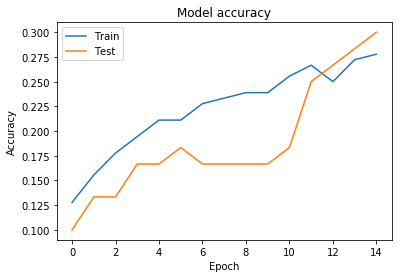

Time taken: 0.96 seconds


In [28]:




time_start=time.time()

model=models.Sequential();
model.add(layers.Dense(5, activation='relu', input_dim=13))


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model=model.fit(train_set, train_labels,epochs=15,batch_size=15, validation_data=(valid_set, val_labels)) 

plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

time_end=time.time()
print('Time taken: {:.2f} seconds'.format(time_end - time_start))



## The results

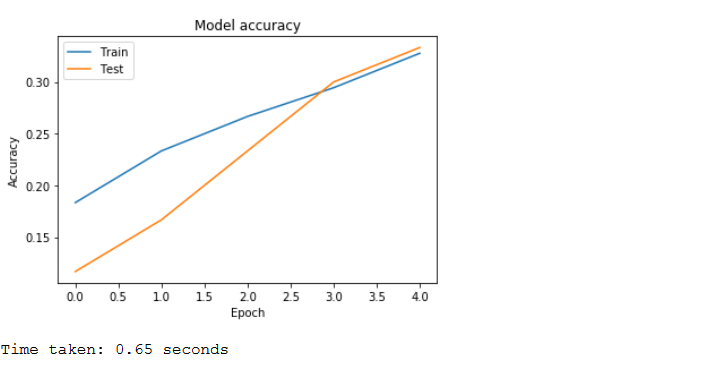

Results for batch size 15, with 5 epochs, softmax as activation function and categorical crossentropy as method for optimizing the loss function.
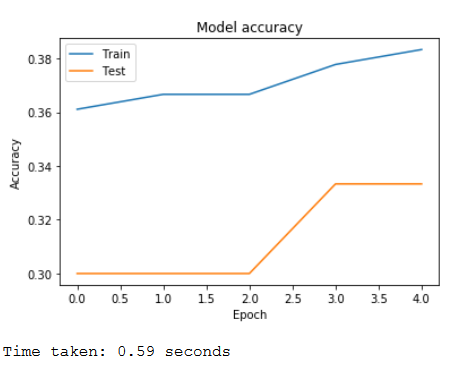
Results for batch size 240, with 5 epochs, softmax as activation function and categorical crossentropy as method for optimizing the loss function.
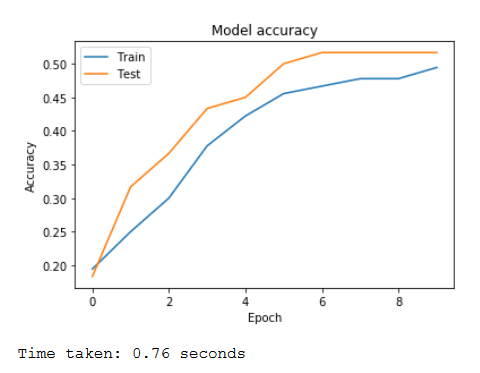
Results for batch size 15, with 10 epochs, softmax as activation function and categorical crossentropy as method for optimizing the loss function.
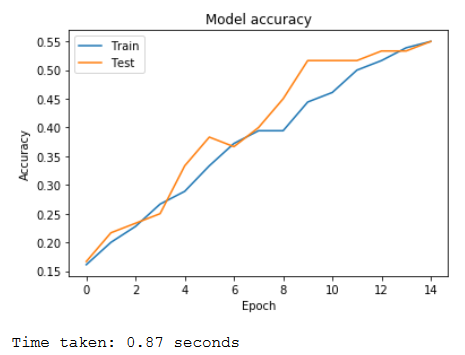
Results for batch size 15, with 15 epochs, softmax as activation function and categorical crossentropy as method for optimizing the loss function.
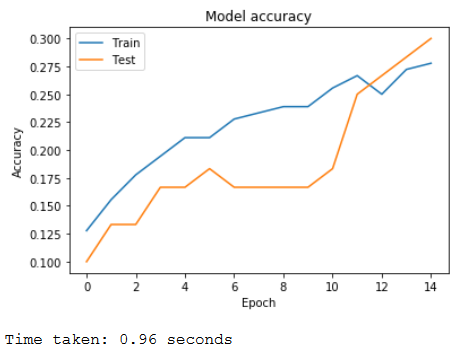
Results for batch size 15, with 15 epochs, ReLu as activation function and categorical crossentropy as method for optimizing the loss function.

## The conclusions

The Case 1 was challenging and educative. It helped us to learn what comes to neural networks at start and we can't wait to solve the Case 2 since the team work has also been fruitful.

We achieved a higher accuracy with the fourth model experiment (55%) than what simple guesswork would provide with almost no variation between training and testing accuracy around the last epoch. We noticed that increasing epochs led to a greatly increased accuracy and lowering batch size also narrowed the discrepancy between training and test sessions, with a negligible increase in spent time. Changing the activation function to ReLu greatly lowered the final accuracy, as expected, although surprisingly taking more time in this case as well.

Using Pandas and Keras was educative and model building and testing demonstrated us a smart way to come to a good result. Our goal wasn't to optimize but to get a good model with high accuracy and low discrepancy between the accuracies obtained in training and validation sessions, which is solid proof that harmful overfitting or underfitting of the data isn't taking place. Unfortunately cross-validation with KerasClassifier/scikit libraries had to be left out due to our inexperience taking up too much time.

It was occasionally difficult to use libraries like Matplotlib due to lack of experience but it was good to practise it here.

## Reference
(A) Instructions for Case1 at course Cognitive Systems for Health Technology Applications TX00DG16-3002 (2019), Assignment - Case1.pdf, https://oma.metropolia.fi. Ref. 9.2.2019.

(B) Lecture-notes at course Cognitive Systems for Health Technology Applications TX00DG16-3002 (2019), Week1_Intro.pdf, https://oma.metropolia.fi. Ref. 9.2.2019.

(C) Lecture-notes at course Cognitive Systems for Health Technology Applications TX00DG16-3002 (2019), Week2_Intro.pdf, https://oma.metropolia.fi. Ref. 9.2.2019.

(D) Aha 1988, Heart-Disease.names.pdf, https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names. Ref. 9.2.2019.

(E) Chollet, F. 2017, Deep Learning with Python, Manning Publications, Version 6, s.79